In [21]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point



#file path of your CSV file
file_path = "Recourses_miguel/indicator_data_download_20230731.csv"
file_path2 = "Recourses_miguel/NIBRSPublicViewJun23.csv"

# Read the CSV file into a pandas DataFrame
df_before_1950 = pd.read_csv(file_path)

# Keep only the first 8 columns in the DataFrame
df_before_1950 = df_before_1950.iloc[:, :8]

# Delete the "Indicator Rate Value Units" column
df_before_1950 = df_before_1950.drop(columns=['Indicator Rate Value Units'])
df_before_1950 = df_before_1950.drop(columns=['What Is This Indicator'])
df_before_1950 = df_before_1950.drop(columns=['Rate Upper Confidence Interval'])
df_before_1950 = df_before_1950.drop(columns=['Rate Lower Confidence Interval'])
df_before_1950 = df_before_1950.rename(columns={'Indicator Rate Value': 'Indicator Rate Value %'})

# Group the DataFrame by "Location Type" and calculate the mean for "Indicator Rate Value %"
grouped_df = df_before_1950.groupby('Location')['Indicator Rate Value %'].mean()

# Display the grouped DataFrame
grouped_df

Location
Acres Home                      7.033333
Addicks Park Ten                0.516667
Afton Oaks / River Oaks        14.633333
Alief                           1.316667
Astrodome Area                  1.383333
                                 ...    
Westbury                        3.216667
Westchase                       0.900000
Westwood                        1.583333
Willow Meadows / Willowbend     2.466667
Willowbrook                     0.033333
Name: Indicator Rate Value %, Length: 88, dtype: float64

In [15]:
df_crime = pd.read_csv(file_path2)
columns_to_drop = ['Incident', 'RMSOccurrenceDate', 'RMSOccurrenceHour', 'NIBRSClass', 'OffenseCount', 'Beat', 'Premise', 'Suffix']
df_crime = df_crime.drop(columns=columns_to_drop)
counts = df_crime['NIBRSDescription'].value_counts()
counts


Theft from motor vehicle                     14714
Simple assault                               11479
Destruction, damage, vandalism               10006
Motor vehicle theft                           9763
Intimidation                                  9461
All other larceny                             8608
All other offenses                            8358
Burglary, Breaking and Entering               6855
Aggravated Assault                            6852
Shoplifting                                   5834
Theft of motor vehicle parts or accessory     5135
Trespass of real property                     4543
Drug, narcotic violations                     3919
Robbery                                       3265
Driving under the influence                   2795
Weapon law violations                         1680
Identify theft                                1662
Disorderly conduct                            1468
Counterfeiting, forgery                       1292
False pretenses, swindle       

In [16]:
df_crime

,NIBRSDescription,StreetNo,StreetName,StreetType,City,ZIPCode,MapLongitude,MapLatitude
0,Driving under the influence,1760,CAMPBELL,RD,HOUSTON,77080,-95.516391,29.802506
1,Weapon law violations,3100,ANITA,ST,HOUSTON,77004,-95.357674,29.732490
2,"Drug, narcotic violations",3100,ANITA,ST,HOUSTON,77004,-95.357674,29.732490
3,"Burglary, Breaking and Entering",5253,HOLLISTER,ST,HOUSTON,77040,-95.506306,29.842607
4,Simple assault,4119,BARBERRY,DR,HOUSTON,77051,-95.367319,29.651655
...,...,...,...,...,...,...,...,...
125009,Motor vehicle theft,12129,THICKET GREEN,NaN,HOUSTON,77035,-95.505057,29.646455
125010,Motor vehicle theft,1100,27TH,ST,HOUSTON,77009,-95.385246,29.811871
125011,Theft of motor vehicle parts or accessory,625,SEMINAR,DR,HOUSTON,77060,-95.389074,29.948228
125012,Motor vehicle theft,5900,BONHOMME,RD,HOUSTON,77036,-95.513692,29.716644


In [28]:
# Define the bounds of Houston
# These should be replaced with the actual bounds
lng_min, lat_min, lng_max, lat_max = -95.8, 29.5, -95, 30.1

In [29]:
# Calculate the step size for the grid
# This assumes you want a 6x6 grid
lng_step = (lng_max - lng_min) / 6
lat_step = (lat_max - lat_min) / 6

In [30]:
# Create an empty GeoDataFrame to hold the grid
grid = gpd.GeoDataFrame()

In [31]:
# Create the grid
for i in range(6):
    for j in range(6):
        # Calculate the bounds of the box
        box_bounds = Polygon([(lng_min + i * lng_step, lat_min + j * lat_step),
                              (lng_min + (i + 1) * lng_step, lat_min + j * lat_step),
                              (lng_min + (i + 1) * lng_step, lat_min + (j + 1) * lat_step),
                              (lng_min + i * lng_step, lat_min + (j + 1) * lat_step)])
        # Create a GeoDataFrame for the box
        box = gpd.GeoDataFrame({'geometry': box_bounds}, index=[0], crs="EPSG:4326")
        # Append the box to the grid
        grid = grid.append(box)
print(grid)

                                            geometry
0  POLYGON ((-95.80000 29.50000, -95.66667 29.500...
0  POLYGON ((-95.80000 29.60000, -95.66667 29.600...
0  POLYGON ((-95.80000 29.70000, -95.66667 29.700...
0  POLYGON ((-95.80000 29.80000, -95.66667 29.800...
0  POLYGON ((-95.80000 29.90000, -95.66667 29.900...
0  POLYGON ((-95.80000 30.00000, -95.66667 30.000...
0  POLYGON ((-95.66667 29.50000, -95.53333 29.500...
0  POLYGON ((-95.66667 29.60000, -95.53333 29.600...
0  POLYGON ((-95.66667 29.70000, -95.53333 29.700...
0  POLYGON ((-95.66667 29.80000, -95.53333 29.800...
0  POLYGON ((-95.66667 29.90000, -95.53333 29.900...
0  POLYGON ((-95.66667 30.00000, -95.53333 30.000...
0  POLYGON ((-95.53333 29.50000, -95.40000 29.500...
0  POLYGON ((-95.53333 29.60000, -95.40000 29.600...
0  POLYGON ((-95.53333 29.70000, -95.40000 29.700...
0  POLYGON ((-95.53333 29.80000, -95.40000 29.800...
0  POLYGON ((-95.53333 29.90000, -95.40000 29.900...
0  POLYGON ((-95.53333 30.00000, -95.40000 30.

C:\Users\migue\AppData\Local\Temp\ipykernel_19488\717786298.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grid = grid.append(box)
C:\Users\migue\AppData\Local\Temp\ipykernel_19488\717786298.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grid = grid.append(box)
C:\Users\migue\AppData\Local\Temp\ipykernel_19488\717786298.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grid = grid.append(box)
C:\Users\migue\AppData\Local\Temp\ipykernel_19488\717786298.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grid = grid.append(box)
C:\Users\migue\AppData\Local\Temp\ipykernel_19488\717786298.py:12: FutureWarning: The frame.appe

In [32]:
# Create a 'geometry' column in df_crime
df_crime['geometry'] = df_crime.apply(lambda row: Point(row.MapLongitude, row.MapLatitude), axis=1)

# Convert df_crime into a GeoDataFrame
gdf_crime = gpd.GeoDataFrame(df_crime, geometry='geometry')

# Check the data
print(gdf_crime.head())

                  NIBRSDescription StreetNo StreetName StreetType     City  \
0      Driving under the influence     1760   CAMPBELL         RD  HOUSTON   
1            Weapon law violations     3100      ANITA         ST  HOUSTON   
2        Drug, narcotic violations     3100      ANITA         ST  HOUSTON   
3  Burglary, Breaking and Entering     5253  HOLLISTER         ST  HOUSTON   
4                   Simple assault     4119   BARBERRY         DR  HOUSTON   

  ZIPCode  MapLongitude  MapLatitude                    geometry  
0   77080    -95.516391    29.802506  POINT (-95.51639 29.80251)  
1   77004    -95.357674    29.732490  POINT (-95.35767 29.73249)  
2   77004    -95.357674    29.732490  POINT (-95.35767 29.73249)  
3   77040    -95.506306    29.842607  POINT (-95.50631 29.84261)  
4   77051    -95.367319    29.651655  POINT (-95.36732 29.65166)  


In [33]:
# Use spatial join to assign each crime to a box
gdf_crime_in_grid = gpd.sjoin(gdf_crime, grid, how="inner", op='within')

# Check the data
print(gdf_crime_in_grid.head())

                   NIBRSDescription StreetNo StreetName StreetType     City  \
0       Driving under the influence     1760   CAMPBELL         RD  HOUSTON   
3   Burglary, Breaking and Entering     5253  HOLLISTER         ST  HOUSTON   
19                     Intimidation     7625   HAMMERLY       BLVD  HOUSTON   
43                     Intimidation     7134    SAWMILL        TRL  HOUSTON   
50              Motor vehicle theft     6401      DEIHL         RD  HOUSTON   

   ZIPCode  MapLongitude  MapLatitude                    geometry  index_right  
0    77080    -95.516391    29.802506  POINT (-95.51639 29.80251)            0  
3    77040    -95.506306    29.842607  POINT (-95.50631 29.84261)            0  
19   77055    -95.479664    29.810615  POINT (-95.47966 29.81061)            0  
43   77040    -95.497205    29.888316  POINT (-95.49720 29.88832)            0  
50   77092    -95.487619    29.852675  POINT (-95.48762 29.85268)            0  


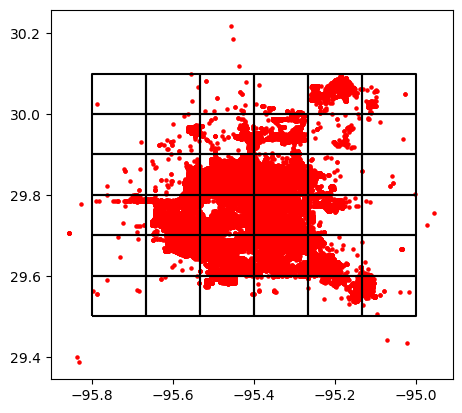

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot the grid
grid.boundary.plot(ax=ax, color='black')

# Plot the crime points
gdf_crime.plot(ax=ax, color='red', markersize=5)

plt.show()


In [38]:
# Create a new GeoDataFrame that includes the count of crimes for each box
grid_with_crime_counts = grid.copy()
grid_with_crime_counts['crime_count'] = crime_counts

# Fill NaN values (i.e., boxes without any crimes) with 0
grid_with_crime_counts['crime_count'] = grid_with_crime_counts['crime_count'].fillna(0)

# Check the data
print(grid_with_crime_counts.head())

                                            geometry  crime_count
0  POLYGON ((-95.80000 29.50000, -95.66667 29.500...       123428
0  POLYGON ((-95.80000 29.60000, -95.66667 29.600...       123428
0  POLYGON ((-95.80000 29.70000, -95.66667 29.700...       123428
0  POLYGON ((-95.80000 29.80000, -95.66667 29.800...       123428
0  POLYGON ((-95.80000 29.90000, -95.66667 29.900...       123428


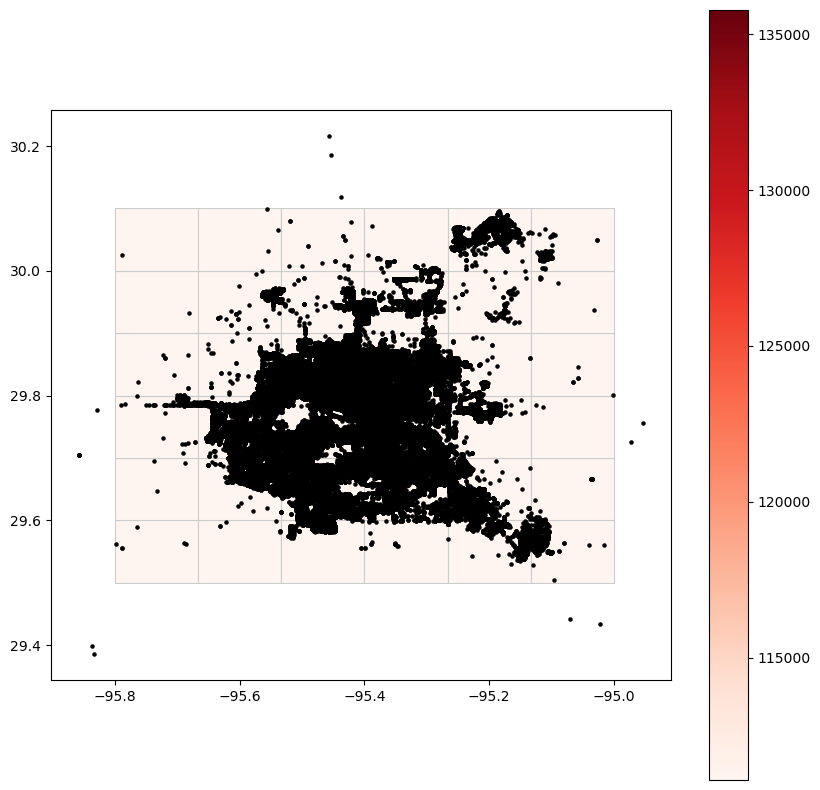

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Create a choropleth map, where each box is colored based on the number of crimes
grid_with_crime_counts.plot(column='crime_count', 
                            cmap='Reds', 
                            linewidth=0.8, 
                            ax=ax, 
                            edgecolor='0.8', 
                            legend=True)

# Plot the points (crimes) on top of the choropleth map
gdf_crime.plot(ax=ax, marker='o', color='black', markersize=5)

plt.show()




In [43]:

df_crime = df_crime.dropna(subset=['MapLatitude', 'MapLongitude'])
import folium

# Create a base map
m = folium.Map(location=[29.75, -95.35], zoom_start=10)

# Add the crime data
for idx, row in df_crime.iterrows():
    folium.CircleMarker((row.MapLatitude, row.MapLongitude), radius=1, color="red").add_to(m)

m.save('map.html')

In [55]:

# add the crime_count column to the grid GeoDataFrame
grid['crime_count'] = crime_counts.values

# Convert grid to GeoJSON
grid_geojson = grid.to_json()

# Create a new folium map, centered around Houston
m = folium.Map(location=[29.7604, -95.3698], zoom_start=11)

# Add the crime data
for idx, row in df_crime.iterrows():
    folium.CircleMarker((row.MapLatitude, row.MapLongitude), radius=1, color="red").add_to(m)

# Add the grid data with tooltip
folium.GeoJson(
    grid_geojson,
    name="Grid",
    style_function=lambda x: {"weight":2, 'color':'#0000ff'},
    tooltip=folium.GeoJsonTooltip(
        fields=['crime_count'],
        aliases=['Crime Count:'],
        localize=True
    )
).add_to(m)

# Save and show the map
m.save('map.html')